# TP – Régression Logistique

Complétez chaque cellule de code ci-dessous.

## 1. Importer les bibliothèques nécessaires

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Charger le jeu de données

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


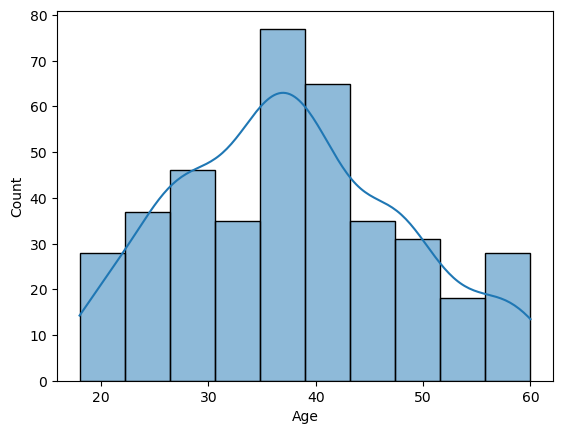

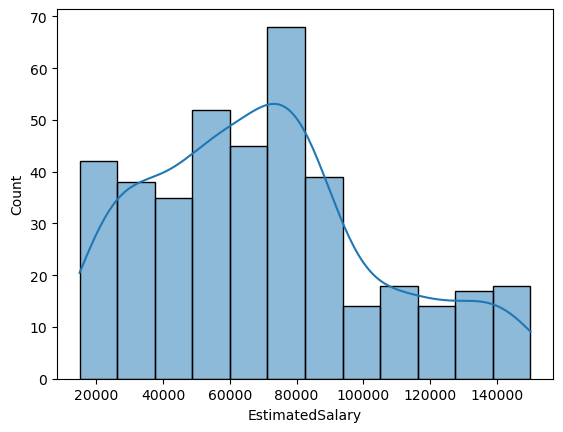

In [18]:
dataset =  pd.read_csv("./data/Social_Network_Ads.csv")

print(dataset.head())

sns.histplot(data=dataset,x="Age",kde=True)
plt.show()

sns.histplot(data=dataset,x="EstimatedSalary",kde=True)

plt.show()

## 3. Fractionner les données (train / test)

In [19]:
X = dataset.iloc[:,[2,3]].values
print(X)

Y = dataset.iloc[:,[4]].values
print(X)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,Y,train_size=.25,random_state=0) 

## 4. Standardisation des variables

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


[[ 1.1234721   0.2132551 ]
 [ 0.14992609  1.71637474]
 [-0.23949232  0.18194011]
 [ 0.14992609  0.11931012]
 [-1.31039293 -1.38380952]
 [ 0.34463529  0.15062511]
 [-0.82361992  0.49509003]
 [ 1.6102451  -1.28986454]
 [-0.23949232 -0.72619468]
 [-0.04478312  0.24457009]
 [-0.82361992 -0.6322497 ]
 [-0.62891072  0.02536514]
 [ 0.44198989 -0.41304475]
 [-0.72626532  2.12346964]
 [ 1.4155359   1.4658548 ]
 [ 1.2208267  -0.97671462]
 [ 1.8049543   2.06083966]
 [-0.82361992 -0.1938398 ]
 [-0.72626532  0.68297999]
 [-1.11568373 -1.60301447]
 [-0.43420152 -1.13328958]
 [ 0.34463529  0.15062511]
 [-0.14213772 -1.07065959]
 [ 1.7075997   1.81031972]
 [ 1.0261175   1.99820967]
 [ 0.34463529  0.11931012]
 [-0.72626532 -0.16252481]
 [-0.04478312  0.15062511]
 [ 0.34463529 -0.13120982]
 [ 1.99966351 -0.6322497 ]
 [-0.72626532  1.52848479]
 [-1.69981133 -0.56961971]
 [-0.04478312  0.2132551 ]
 [ 0.34463529 -0.25646979]
 [ 1.1234721   0.68297999]
 [-0.92097453  0.36983006]
 [ 1.5128905   0.46377504]
 

## 5. Entraîner le modèle de régression logistique

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/home/yassine/miniconda3/envs/ENSAM/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 6. Tester le modèle

In [26]:
y_pred = classifier.predict(X_test)

## 7. Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# ligne de la matrice de confusion représente les instances d'une classe réelle
# chaque colonne représente les instances d'une classe prédite.

cm = confusion_matrix(y_test,y_pred)

## 8. Visualisation – Jeu d'entraînement

## 9. Visualisation – Jeu de test

## 10. Performance du modèle

## 11. KNN (distance euclidienne)

## 12. SVM